In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def plot_fit(x,y,mu,var, m_y='k-o', m_mu='b-<', l_y='true', l_mu='predicted', legend=True, title=''):
    """
    Plot the fit of a GP
    """
    if y is not None:
        plt.plot(x,y, m_y, label=l_y)
    plt.plot(x,mu, m_mu, label=l_mu)
    vv = 2*np.sqrt(var)
    plt.fill_between(x[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.2, edgecolor='gray', facecolor='cyan')
    if legend:
        plt.legend()
    if title != '':
        plt.title(title)

In [49]:
import datetime as dt
import numpy as np
import pandas as pd
import fxcmpy
from fxcmpy import fxcmpy_tick_data_reader as tdr
import tables as tb

con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo')
print(con.get_instruments())
data = con.get_candles('EUR/USD', period='D1',number=100)
data.head()

#start = dt.datetime(2017, 1, 2)
#end = dt.datetime(2017, 1, 3)
#data = tdr('AUDCAD', start, end, verbosity=True)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/ILS', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-07-17 21:00:00,1.12090,1.12236,1.12331,1.11991,1.12114,1.12250,1.12342,1.12003,122711
2019-07-18 21:00:00,1.12236,1.12761,1.12799,1.12045,1.12250,1.12779,1.12811,1.12058,209049
2019-07-19 21:00:00,1.12761,1.12194,1.12814,1.12028,1.12779,1.12228,1.12826,1.12041,193995
2019-07-21 21:00:00,1.12194,1.12124,1.12162,1.12124,1.12228,1.12155,1.12197,1.12155,189
2019-07-22 21:00:00,1.12124,1.12082,1.12249,1.12055,1.12155,1.12095,1.12261,1.12068,139439


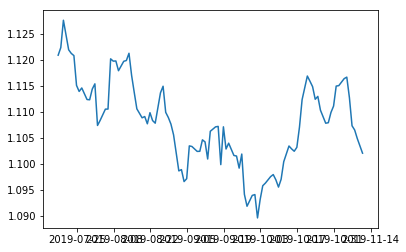

In [50]:
plt.plot(data['bidopen'])

In [51]:
ytr=np.array(data['bidopen'])
length=ytr.shape[0]
xtr=np.linspace(1,length,num=length)
ytr=ytr[:,None]
xtr=xtr[:,None]

In [103]:
import GPy
Q = xtr.shape[1]
#k = RationalQuadratic(Q)
k1=GPy.kern.StdPeriodic(Q)
k2=GPy.kern.RBF(Q)
k3=GPy.kern.Linear(Q)
k4=GPy.kern.Poly(Q)

# Combining Polynomial kernal and periodic kernal

Polynomial kernal:
    $$k(x,y)=(x^T*y+c)^d$$


Periodic kernal:
    k(x,y) = $$\theta_1 \exp \left[  - \frac{1}{2} \sum_{i=1}^{input\_dim}
       \left( \frac{\sin(\frac{\pi}{T_i} (x_i - y_i) )}{l_i} \right)^2 \right]$$

Optimization restart 1/20, f = -277.77564477901205
Optimization restart 2/20, f = -337.67300900399


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 3/20, f = -392.77336244814614
Optimization restart 4/20, f = -321.81836199347947
Optimization restart 5/20, f = -181.16138429469953
Optimization restart 6/20, f = -316.65738697432596
Optimization restart 7/20, f = -376.1301650161023
Optimization restart 8/20, f = -329.12342438682583
Optimization restart 9/20, f = -170.8116146548223
Optimization restart 10/20, f = -255.6992995089391
Optimization restart 11/20, f = -334.2028403494636
Optimization restart 12/20, f = -253.7312150355761
Optimization restart 13/20, f = -157.60226601880066
Optimization restart 14/20, f = -352.9948875682738
Optimization restart 15/20, f = -299.11238060641585
Optimization restart 16/20, f = -314.3587334006943
Optimization restart 17/20, f = -201.36785650034923
Optimization restart 18/20, f = -368.0765663001656


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in sin
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:150: RuntimeWarning:overflow encountered in sin
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:150: RuntimeWarning:invalid value encountered in sin
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:overflow encountered in cos
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in cos


Optimization restart 19/20, f = -354.3493800944275
Optimization restart 20/20, f = -281.5198742567205


GP_regression.,value,constraints,priors
sum.poly.variance,0.03747514466239965,+ve,
sum.poly.scale,2.281215439015661e-05,+ve,
sum.poly.bias,0.7279641581363027,+ve,
sum.std_periodic.variance,0.6123987062293724,+ve,
sum.std_periodic.period,59.34543032038064,+ve,
sum.std_periodic.lengthscale,6.1250405201205345,+ve,
Gaussian_noise.variance,1.3000263915549072e-05,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2c8b55c0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2c8b5518>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2c8b5a20>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


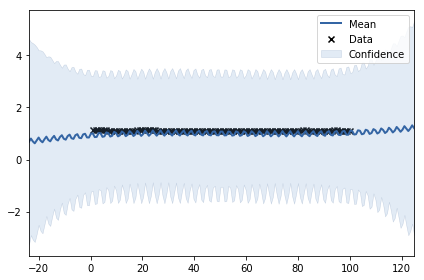

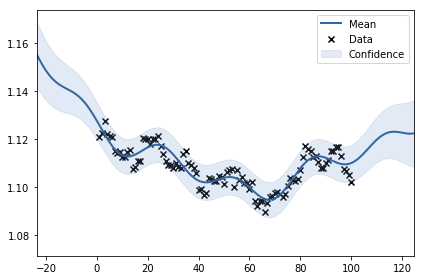

In [128]:
k=k4+k1 #polynomial kernal and periodic kernal
m = GPy.models.GPRegression(X=xtr, Y=ytr, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 20, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -392.77336244814614
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.poly.variance             |     0.03747514466239965  |      +ve      |        
  sum.poly.scale                |   2.281215439015661e-05  |      +ve      |        
  sum.poly.bias                 |      0.7279641581363027  |      +ve      |        
  sum.std_periodic.variance     |      0.6123987062293724  |      +ve      |        
  sum.std_periodic.period       |       59.34543032038064  |      +ve      |        
  sum.std_periodic.lengthscale  |      6.1250405201205345  |      +ve      |        
  Gaussian_noise.variance       |  1.3000263915549072e-05  |      +ve      |        


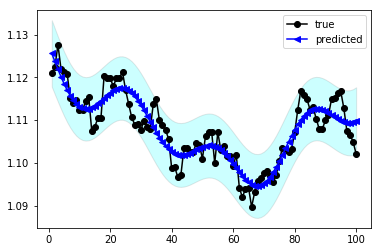

In [129]:
print(m)
X_star=xtr
Y_star=ytr
mu,var = m.predict(X_star)
plot_fit(X_star, Y_star, mu, var)

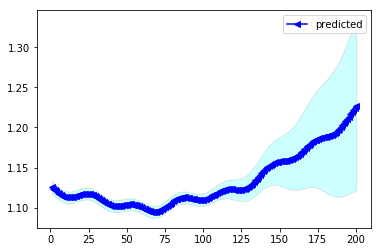

In [131]:
X_extrap=np.linspace(1,200,200)[:,None]
mu,var = m.predict(X_extrap)
plot_fit(X_extrap, None, mu, var)


# RBF Kernal


$$k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)$$

Optimization restart 1/20, f = -376.6800668222783
Optimization restart 2/20, f = -362.87541201677186
Optimization restart 3/20, f = -370.6600598308073


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 4/20, f = -376.68006681709693
Optimization restart 5/20, f = -376.68006681795856
Optimization restart 6/20, f = -370.6600598309203
Optimization restart 7/20, f = -376.68006682157096
Optimization restart 8/20, f = -370.66005983009825
Optimization restart 9/20, f = -376.6800668204486
Optimization restart 10/20, f = -376.6800668215176
Optimization restart 11/20, f = -372.69326434095666
Optimization restart 12/20, f = -376.68006682169516
Optimization restart 13/20, f = -376.6800668222808
Optimization restart 14/20, f = -370.66005983113365
Optimization restart 15/20, f = -370.6600598307582
Optimization restart 16/20, f = 152.1501893558345
Optimization restart 17/20, f = -370.6600598296855
Optimization restart 18/20, f = -372.69326434097655
Optimization restart 19/20, f = -372.69326432339875
Optimization restart 20/20, f = -376.6800668004705


GP_regression.,value,constraints,priors
rbf.variance,0.5195998306488872,+ve,
rbf.lengthscale,22.610232921474697,+ve,
Gaussian_noise.variance,1.1866907894776202e-05,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2f0bdc88>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2f0bdb70>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2f0c8160>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


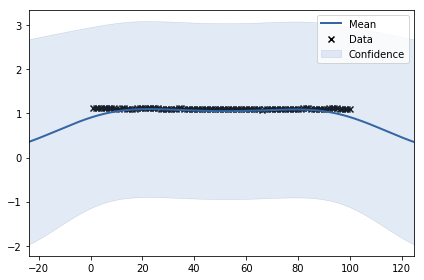

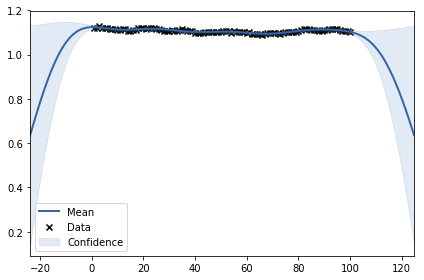

In [132]:
k=k2
m = GPy.models.GPRegression(X=xtr, Y=ytr, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 20, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -376.6800668222808
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.5195998306488872  |      +ve      |        
  rbf.lengthscale          |      22.610232921474697  |      +ve      |        
  Gaussian_noise.variance  |  1.1866907894776202e-05  |      +ve      |        


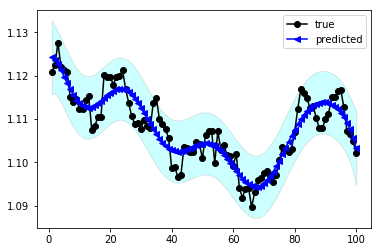

In [133]:
print(m)
X_star=xtr
Y_star=ytr
mu,var = m.predict(X_star)
plot_fit(X_star, Y_star, mu, var)

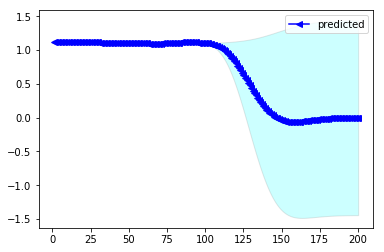

In [134]:
X_extrap=np.linspace(1,200,200)[:,None]
mu,var = m.predict(X_extrap)
plot_fit(X_extrap, None, mu, var)

# Combine RBF kernal and Polynomial kernal

 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/20, f = -425.7889396074255
Optimization restart 2/20, f = -361.77068068822274
Optimization restart 3/20, f = -426.04996047857054
Optimization restart 4/20, f = -387.7485927352086
Optimization restart 5/20, f = -387.74860123049467
Optimization restart 6/20, f = -411.90034380842565
Optimization restart 7/20, f = -420.90133506347826
Optimization restart 8/20, f = -315.528961863869


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 9/20, f = -425.4409507384324
Optimization restart 10/20, f = -118.89262492055173
Optimization restart 11/20, f = -425.4172105148739
Optimization restart 12/20, f = -386.30900577158076
Optimization restart 13/20, f = -425.9133354986548
Optimization restart 14/20, f = -425.913335524508
Optimization restart 15/20, f = -424.0335607773015
Optimization restart 16/20, f = -423.18841625655796
Optimization restart 17/20, f = -422.0282081705188
Optimization restart 18/20, f = -417.9374878994313
Optimization restart 19/20, f = -380.34286752542556
Optimization restart 20/20, f = -427.1313557300017


GP_regression.,value,constraints,priors
sum.rbf.variance,5.509929786082009e-05,+ve,
sum.rbf.lengthscale,3.600599555204821,+ve,
sum.std_periodic.variance,1.2276288576616747,+ve,
sum.std_periodic.period,0.5525043082131141,+ve,
sum.std_periodic.lengthscale,1048.8200614375212,+ve,
Gaussian_noise.variance,3.671764860276239e-06,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a29da5d68>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a29da5518>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a29da5ac8>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


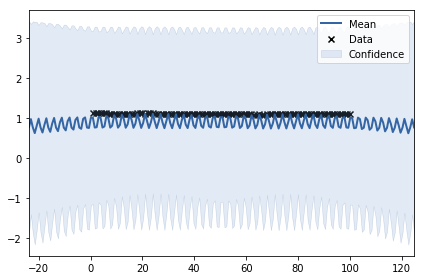

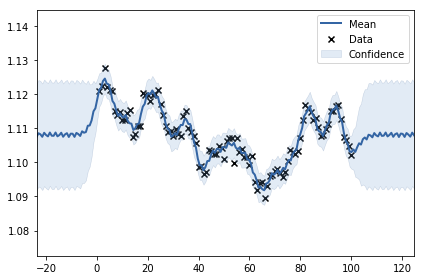

In [136]:
k=k2+k1
m = GPy.models.GPRegression(X=xtr, Y=ytr, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 20, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -427.1313557300017
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                  value  |  constraints  |  priors
  sum.rbf.variance              |  5.509929786082009e-05  |      +ve      |        
  sum.rbf.lengthscale           |      3.600599555204821  |      +ve      |        
  sum.std_periodic.variance     |     1.2276288576616747  |      +ve      |        
  sum.std_periodic.period       |     0.5525043082131141  |      +ve      |        
  sum.std_periodic.lengthscale  |     1048.8200614375212  |      +ve      |        
  Gaussian_noise.variance       |  3.671764860276239e-06  |      +ve      |        


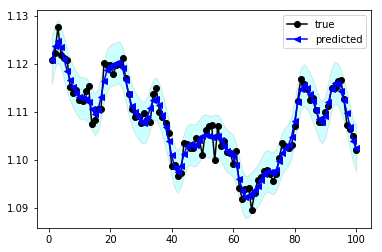

In [137]:
print(m)
X_star=xtr
Y_star=ytr
mu,var = m.predict(X_star)
plot_fit(X_star, Y_star, mu, var)

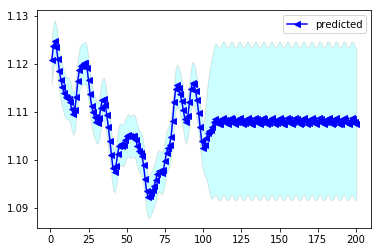

In [138]:
X_extrap=np.linspace(1,200,200)[:,None]
mu,var = m.predict(X_extrap)
plot_fit(X_extrap, None, mu, var)

# Combine linear kernal and periodic kernal

The linear kernal is defined as:
$$k(x,y) = \sum_{i=1}^{\text{input_dim}} \sigma^2_i x_iy_i$$

Optimization restart 1/20, f = -390.456092364915
Optimization restart 2/20, f = -345.95058583840546
Optimization restart 3/20, f = -225.41518004657195
Optimization restart 4/20, f = -346.4118814629422


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: RuntimeWarning:invalid value encountered in multiply


Optimization restart 5/20, f = -382.4458584588648
Optimization restart 6/20, f = -338.92337514076945
Optimization restart 7/20, f = -328.08240291074554
Optimization restart 8/20, f = -374.4679646392382
Optimization restart 9/20, f = -248.9835166838844
Optimization restart 10/20, f = -338.92337433527075
Optimization restart 11/20, f = -345.7580881031284
Optimization restart 12/20, f = -354.89195633820486
Optimization restart 13/20, f = -371.3271379271157
Optimization restart 14/20, f = -390.45609235938105
Optimization restart 15/20, f = -382.2768242083611
Optimization restart 16/20, f = -364.770961159617
Optimization restart 17/20, f = -381.97079846471706
Optimization restart 18/20, f = -343.0479845008332
Optimization restart 19/20, f = -338.9233749535855
Optimization restart 20/20, f = -362.3439920158904


GP_regression.,value,constraints,priors
sum.linear.variances,1.0797126938477254e-08,+ve,
sum.std_periodic.variance,0.44398003750749754,+ve,
sum.std_periodic.period,1.0112221050986054,+ve,
sum.std_periodic.lengthscale,1.9974206396808225,+ve,
Gaussian_noise.variance,1.272503247506996e-05,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2ba752e8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2ba75f98>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2ba750b8>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


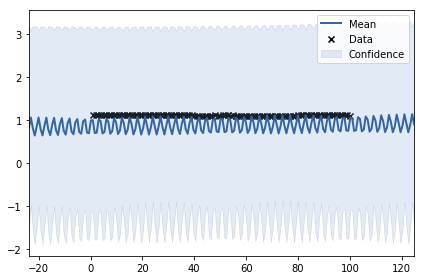

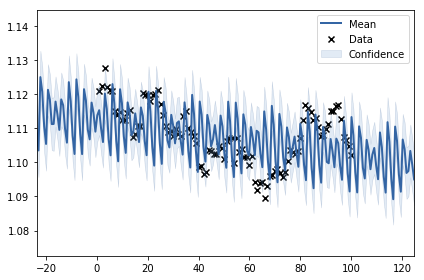

In [142]:
k=k3+k1
m = GPy.models.GPRegression(X=xtr, Y=ytr, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 20, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -390.456092364915
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.linear.variances          |  1.0797126938477254e-08  |      +ve      |        
  sum.std_periodic.variance     |     0.44398003750749754  |      +ve      |        
  sum.std_periodic.period       |      1.0112221050986054  |      +ve      |        
  sum.std_periodic.lengthscale  |      1.9974206396808225  |      +ve      |        
  Gaussian_noise.variance       |   1.272503247506996e-05  |      +ve      |        


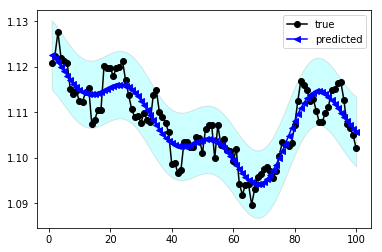

In [143]:
print(m)
X_star=xtr
Y_star=ytr
mu,var = m.predict(X_star)
plot_fit(X_star, Y_star, mu, var)

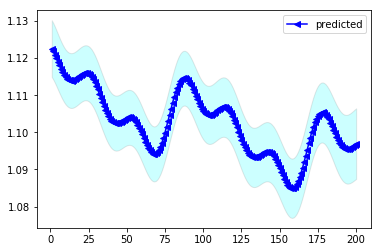

In [144]:
X_extrap=np.linspace(1,200,200)[:,None]
mu,var = m.predict(X_extrap)
plot_fit(X_extrap, None, mu, var)